Test File Download

In [0]:
from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id='1TbWPC_DNCjWLnZdkVF6J_8kWKMlNawAl', dest_path='./ColorTest.zip', unzip=True)

Unzipping...Done.


# OCR Pre-process: Multi Colored Text Enhancement

start..
4.png


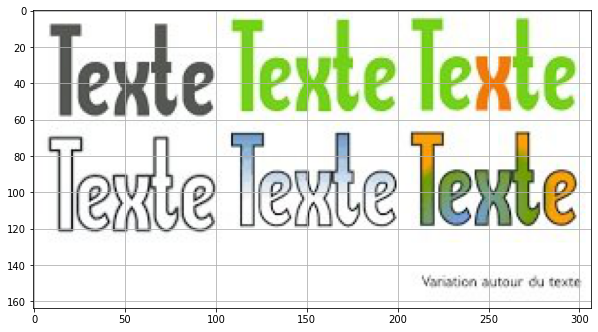

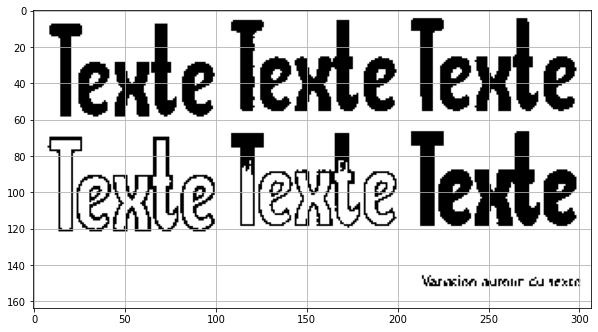

start..
5.png


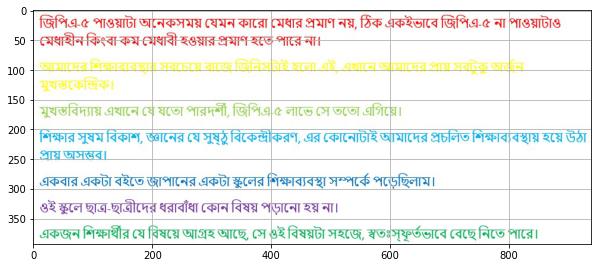

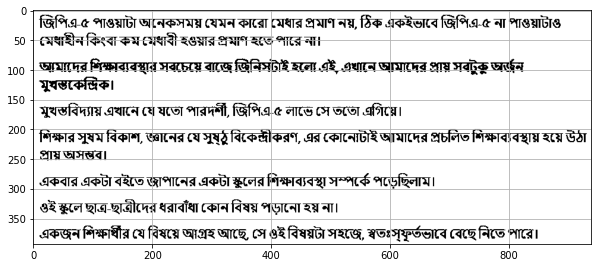

start..
3.png


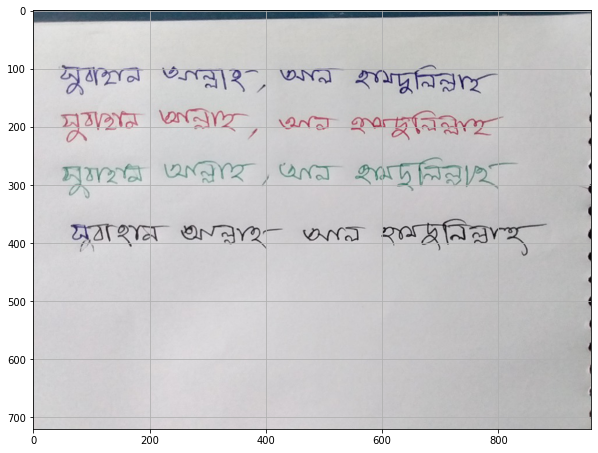

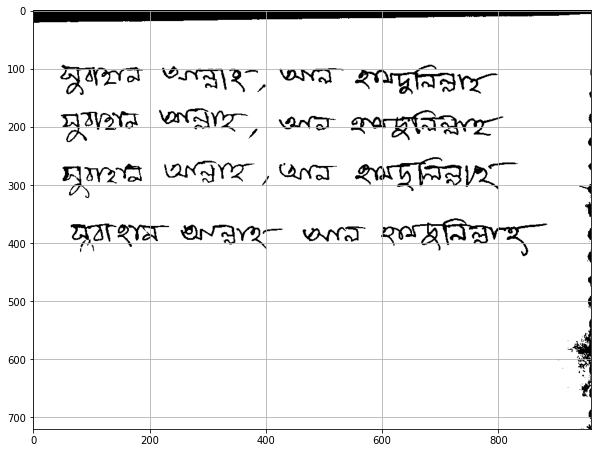

start..
2.png


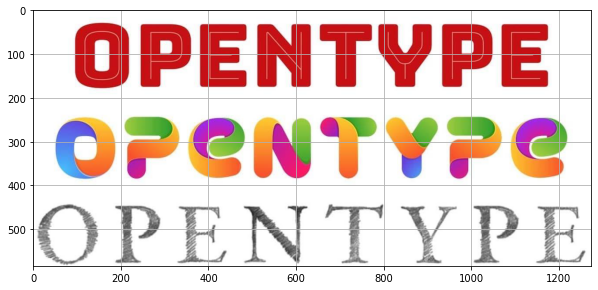

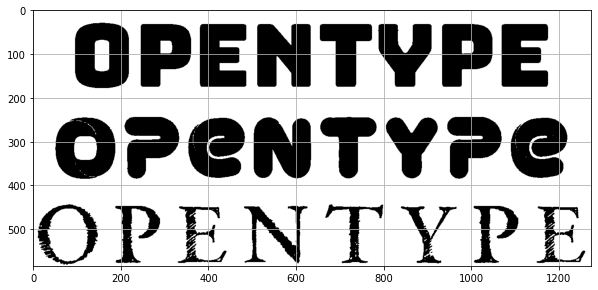

start..
1.png


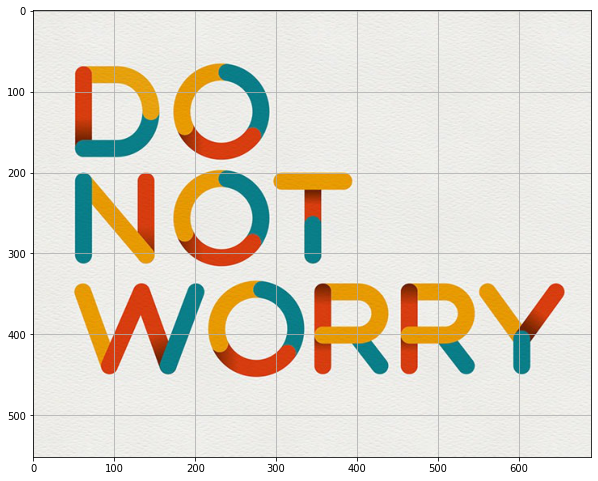

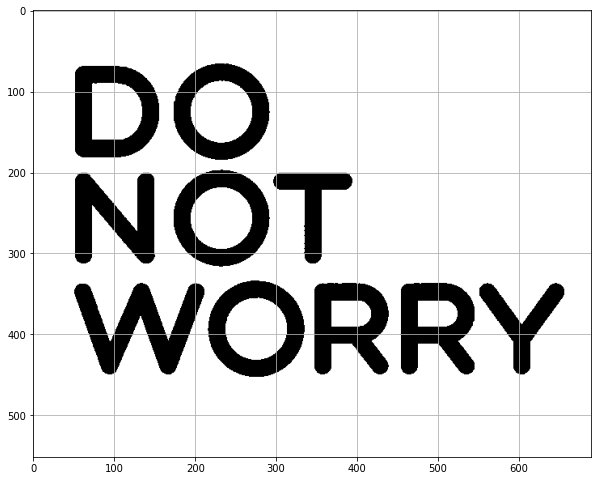

In [0]:
import glob
import os
import random
import sys
import random
import math
import json
import logging
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw, ExifTags, ImageEnhance,ImageFilter,ImageOps
import numpy as np

def binarization(path, out_path):
    orig_im = Image.open(path)
    #orig_im = rotation_fixing(orig_im)
    plt.figure(figsize=(10,10))
    plt.grid()
    plt.imshow(orig_im)
    plt.show()

    orig_im = ImageOps.autocontrast(orig_im,cutoff=3,ignore=None)

    ## Manul equalization on RGB Iamge ----------------------------
    img = np.array(orig_im)
    red, green, blue = img[..., 0], img[..., 1], img[..., 2]
    mval = np.mean(img)*0.7
    img[(green > mval) & (blue > mval) & (red > mval)] = [255,255,255]
    img[(green <= mval) | (blue <= mval) | (red <= mval)] = [0,0,0]

    #img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    #img = cv2.GaussianBlur(img,(5,5),0)
    #img = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2) 
    #img = cv2.threshold(np.float32(img),227,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    plt.figure(figsize=(10,10))
    plt.grid()
    plt.imshow(img)
    plt.show()
    #cv2.imwrite(out_path,img)


def main():
  File_dir = "/content/"
  for image_file in glob.iglob('*.png'):
      print("start..")
      print(image_file)
      src = File_dir+image_file
      out = File_dir+"/Color_"+image_file
      binarization(src,out)

if __name__ == '__main__':
    main()